In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from myst_nb import glue
#from ipywidgets import widgets
#from ipywidgets import interactive
#from IPython.display import display, Javascript

from matplotlib.colors import LogNorm, Normalize
#import bamboolib

In [2]:
import os
current_directory = os.getcwd()
print("Current directory : ", current_directory)

aymeric =  "/home/aymeric/python-scripts/espadon/data/" #aymeric
jp = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
jp_index = '~/Dropbox/Mac/Desktop/CRD Anses/code/indexation_results/' # Jean Philippe index

if 'aymeric' in current_directory:
    path_base = aymeric

elif 'Mac' in current_directory:
    path_base = jp
elif 'd:/Projects' in current_directory:
    path_base = "d:/Projects/Medialab/"

print("Path base : ", path_base)

Current directory :  /home/aymeric/python-scripts/espadon/my-espadon-notebook
Path base :  /home/aymeric/python-scripts/espadon/data/


In [3]:

dic_id={}
for x in [x for x in pd.read_csv(glob.glob(f'{path_base}sm/*.csv')[0]).columns if 'id' in x]:
    dic_id[x]=str



In [4]:
df0= pd.read_csv(f"{path_base}corpus_tweets.csv", sep = ",", dtype = dic_id)

/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8,10,22,28,29,30,32,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:

#users = pd.read_csv('../outcome/user_sm_predicted.csv',dtype=dic_id) #jean-philippe
users = pd.read_csv(f'{path_base}recoded_user_sm_predicted.csv',dtype=dic_id)


In [6]:
df0 = df0[['query', 'id', 'timestamp_utc', 'local_time',
           'user_screen_name', 'text',  'user_location',  'user_id', 'user_name',
           'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK',
           'BRAF', 'MET', 'RET', 'HER2', 'date']]

In [7]:
df0['date'] = pd.to_datetime(pd.to_datetime(df0['date']).dt.date)
df0['Year'] = df0['date'].dt.year


In [8]:
df=df0.merge(users,on=['user_id'], how = "inner")#how = inner by default
df = df.loc[(df["User_status"] != "Other") & (df["User_status"] != "Undefined") & (df["Year"] >= 2012)]

## Qui parle de quel marqueur ?

Enfin, Les deux "heatmaps" ci-dessous illustrent respectivement la part des références aux différents biomarqueurs dans les tweets publiés par chacun des statuts, puis la proportion de tweets publiés par les différents types de comptes en fonction des biomarqueurs qu'ils contiennent. 

La première heatmap indique que "ALK" est présent dans 16% des tweets citant un biomarqueur tous statuts confondus. Cette proportion passe à 30% lorsqu'on prend uniquement en compte les tweets publiés par les "advocacy patients". En ce qui concerne "HER2", il est présents dans 30% de l'ensemble des tweets et dans 40% des tweets publiés par les "médias" contenant le nom d'un biomarqueur. 

La deuxième heatmap montre que les "advocacy patients" sont à l'origine de 15% des tweets environ mentionnant un biomarqueurs et qu'ils sont auteurs de près de 28% des tweets citant spécifiquement le marqueur "ALK". On observe également que les médias ont commis 25% des tweets portant sur les biomarqueurs et plus de 37% des tweets sur le marqueur "HER2".



In [9]:
df_status = df[["User_status", "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]
df_tmp = df_status.loc[df_status["ALK"]==1].groupby(["User_status", "ALK"]).agg(ALK_c = ("id", "count"))

In [10]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
variable = "User_status"
df_status = df[[variable, "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]


for i, bio in enumerate(biom):
    df_tmp = df_status.loc[df_status[bio]==1].groupby([variable, bio]).agg(bio = ("id", "count")).reset_index()
    df_tmp = df_tmp[[variable,"bio"]].rename(columns = {"bio": bio})
    
    if i==0:
        pivot_table = df_tmp
    else:
        pivot_table = pivot_table.merge(df_tmp, how = "left", on = [variable]) 

pivot_table["somme_ligne"] = pivot_table[biom].sum(axis=1)
pivot_table.loc['Column_Total']= pivot_table.sum(numeric_only=True, axis=0)
pivot_table = pivot_table.fillna("Total")

df_tmp = pivot_table.copy()
biom.append("somme_ligne")
for i, status in enumerate(pivot_table[variable]):
    for i, bio in enumerate(biom):
        df_tmp[bio] = pivot_table[bio]/pivot_table["somme_ligne"]*100
    
pivot_table = df_tmp[[variable, 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]
pivot_table.index = pivot_table[variable]
pivot_table = pivot_table.drop(columns = [variable])

In [11]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
variable = "User_status"
df_status = df[[variable, "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]


for i, bio in enumerate(biom):
    df_tmp = df_status.loc[df_status[bio]==1].groupby([variable, bio]).agg(bio = ("id", "count")).reset_index()
    df_tmp = df_tmp[[variable,"bio"]].rename(columns = {"bio": bio})
    
    if i==0:
        pivot_table1 = df_tmp
    else:
        pivot_table1 = pivot_table1.merge(df_tmp, how = "left", on = [variable]) 

pivot_table1["somme_ligne"] = pivot_table1[biom].sum(axis=1)


df_tmp = pivot_table1.copy()
biom.append("somme_ligne")
for i, status in enumerate(pivot_table1[variable]):
    for i, bio in enumerate(biom):
        df_tmp[bio] = pivot_table1[bio]#/pivot_table["somme_ligne"]*100
    
pivot_table1 = df_tmp[[variable, 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2', 'somme_ligne']]
pivot_table1.index = pivot_table1[variable]
pivot_table1 = pivot_table1.drop(columns = [variable])
pivot_table1.loc['Column_Total']= pivot_table1.sum(numeric_only=True, axis=0)


[Text(0.5, 1.0, 'Proportion des références aux biomarqueurs en fonction du statut des auteurs (% en ligne)')]

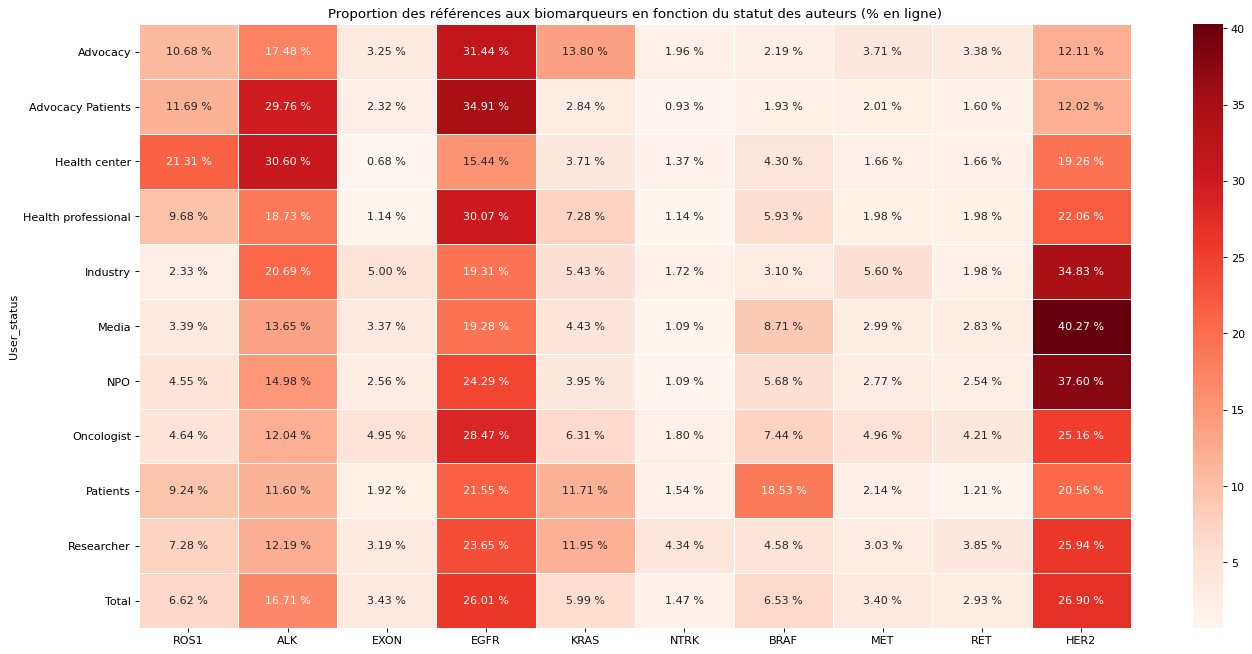

In [12]:
#fig = px.imshow(pivot_table,color_continuous_scale='reds', title = "Proportion des références aux différents biomarqueurs en fonction du statut des auteurs")
#fig.show()

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(pivot_table, annot=True, linewidths=.5, fmt='.2f',  cmap="Reds")

for t in res.texts: t.set_text(t.get_text() + " %")
#plt.savefig('biomarkers_dist.pdf')
res.set(title ="Proportion des références aux biomarqueurs en fonction du statut des auteurs (% en ligne)")

In [13]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
variable = "User_status"
df_status = df[[variable, "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]


for i, bio in enumerate(biom):
    df_tmp = df_status.loc[df_status[bio]==1].groupby([variable, bio]).agg(bio = ("id", "count")).reset_index()
    df_tmp = df_tmp[[variable,"bio"]].rename(columns = {"bio": bio})
    
    if i==0:
        pivot_table = df_tmp
    else:
        pivot_table = pivot_table.merge(df_tmp, how = "left", on = [variable]) 

pivot_table["Row_Total"] = pivot_table[biom].sum(axis=1)
pivot_table.loc['Column_Total']= pivot_table.sum(numeric_only=True, axis=0)
pivot_table = pivot_table.fillna("Total")

df_tmp = pivot_table.copy()

df_tmp.index = df_tmp[variable]
df_tmp = df_tmp.drop(columns = [variable])

pivot_table = pd.DataFrame.transpose(df_tmp).reset_index()
pivot_table
df_tmp = pivot_table.copy()

for i, status in enumerate(pivot_table["index"]):
    for i, bio in enumerate(pivot_table.columns[1:]):
        df_tmp[bio] = pivot_table[bio]/pivot_table["Total"]*100

pivot_table = df_tmp.drop(columns = ["Total"])
pivot_table.index = pivot_table["index"]
pivot_table = pivot_table.drop(columns = ["index"])

pivot_table2 = pivot_table.transpose()

[Text(0.5, 1.0, 'Part des statuts en fonction des références aux différents biomarqueurs (% en colonne)')]

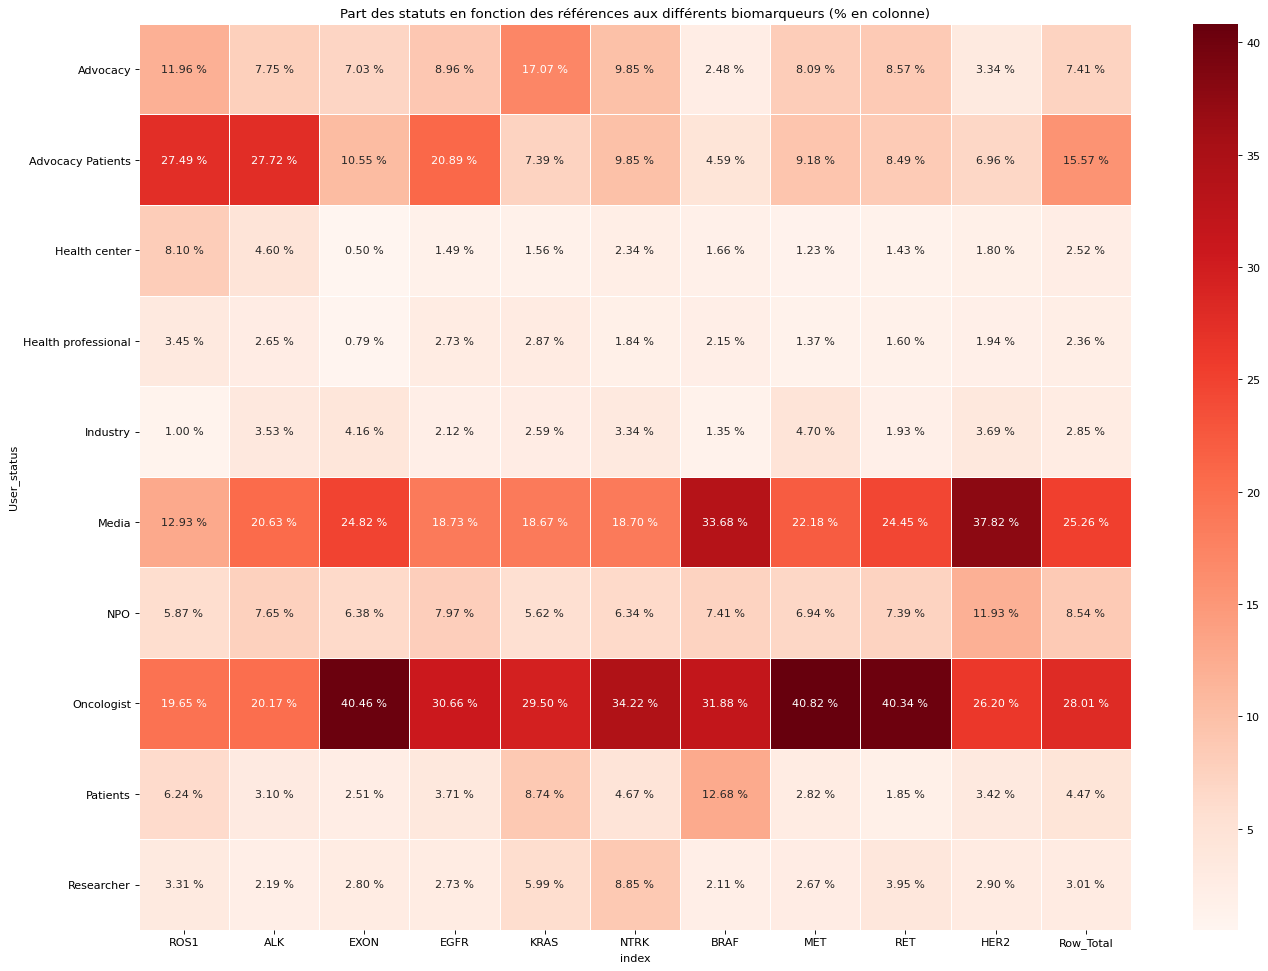

In [14]:
#fig = px.imshow(pivot_table2,color_continuous_scale='reds', title = "Part des statuts en fonction des références aux différents biomarqueurs (% en colonne)")
#fig.show()

fig = plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(pivot_table2, annot=True, linewidths=.5, fmt='.2f',  cmap="Reds")

for t in res.texts: t.set_text(t.get_text() + " %")
#plt.savefig('biomarkers_dist.pdf')
res.set(title ="Part des statuts en fonction des références aux différents biomarqueurs (% en colonne)")

In [15]:
pivot_table1_style = pivot_table1.style.format(precision=0, na_rep='')\
.set_caption("Les nombre de références aux biomarqueurs en fonction du statut des auteurs")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top ; color: black ; font-size : 14pt'
 }], overwrite=False)

pivot_table1_style


pivot_table1 = pivot_table1.reset_index()

## Relation entre biomarqueurs et statuts et le coefficient de *phi*

Afin de mieux apprécier la force des relations entre les biomarqueurs et les différents groupes d'acteur, on peut utilisé le coeffecient de *Phi* ($\Phi$) qui sert à calculer la corrélation entre deux variables binaires. Soit le tableau 2x2 ci-dessous:

|     | y=1    | y=0   |     |
|-----|--------|-------|-----|
| x=1 | n11    | n10   | n1. |
| x=0 | n01    | n00   | n0. |
|     | n.1    | n.0   | n   |

Le coefficient de *Phi* permet de mesurer la nature et l'intensité de la relation entre les variables x et y. On le calcule de la façon suivante:

\begin{align}
\Phi = \frac{(n_{11}n_{00}) - (n_{10}n_{00})}{\sqrt{n_{1\cdot} n_{0\cdot} n_{\cdot1} n_{\cdot0}}}
\end{align}

La valeur de *Phi* se situe entre 1 (association positive "parfaite") et -1 (association négative "parfaite"). Si *Phi* est égale à zéro, cela signifie une absence de relation entre les deux variables. On peut ensuite utiliser la statistique du Khi-deux pour estimer la significativité de la relation observée sachant que $\chi^2 = n \times \Phi^2$.

C'est cette relation que la troisième heatmap ci-dessous dépeint. Seule les liens significatifs ont été gardés (nous avons considéré un seuil à 0,01). 

La fonction consiste a reconstruire un tableau 2x2 pour chaque couple de biomarqueur et de statut, à calculer le coefficient de *Phi* pour ce tableau puis à le conserver uniquement s'il est significatif. 

Par exemple, on observe que les "Advocacy Patients" ont publié 1884 tweets contenant au moins une fois le biomarqueur "ALK". Comme on connaît le nombre de tweets publiés par les "Advocacy Patients" contenant un biomarqueur quelqu'il soit, le nombre de tweets contenant le marqueur "ALK" et le nombre total de tweets contenant un biomarqueur, on peut facilement reconstruire le tableau :


In [16]:
%%html
<table>
    <tr>
        <th rowspan=2> Tweets publiés par des Advocacy Patients </th>
        <th colspan=2> Tweets contenant le biomarqueur ALK </th>
    </tr>
    <tr>
        <td> Oui </td>
        <td> Non </td>
        <td>Total</td>
    </tr>
    <tr>
        <td> Oui </td>
        <td> 1 884 </td>
        <td> 4 447 </td>
        <td>6 331</td>
    </tr>
    <tr>
        <td> Autre </td>
        <td> 4 913 </td>
        <td> 29 421 </td>
        <td>34 334</td>
    </tr>
    <tr>
        <td> Total </td>
        <td> 6 797</td>
        <td> 33 868</td>
        <td>40 665</td>
    </tr>
</table>
 

Le coefficient *Phi* et le *Khi-deux* sont égal à :
\begin{align}
\Phi = \frac{(1884 \times 33526) - (4447 \times 808)}{\sqrt{6331 \times 34334 \times 2692 \times 37 973}} \approx 0,15
\end{align}

\begin{align}
\chi^2 = 40665 \times \Phi^2 \approx 916.44
\end{align}

Selon la table statistique du *Khi-deux*, pour un tableau de degré de liberté 1 et un seuil à 0,01, on peut rejeter raisonnablement l'hypothèse d'indépendance et considérée la relation positive entre "Advocacy Patients" et "ALK" comme étant significative. Le coefficient de Phi sera donc conservé pour construire la heatmap ci-dessous.

On fait ensuite la même chose pour le couple "Advocacy Patients"/"HER2". Connaissant également les marges du tableau, on peut reconstruire un tableau 2x2:

In [17]:
%%html
<table>
    <tr>
        <th rowspan=2> Tweets publiés par des Advocacy Patients </th>
        <th colspan=2> Tweets contenant le biomarqueur HER2 </th>
    </tr>
    <tr>
        <td> Oui </td>
        <td> Non </td>
        <td>Total</td>
    </tr>
    <tr>
        <td> Oui </td>
        <td> 761 </td>
        <td> 5 570 </td>
        <td>6 331</td>
    </tr>
    <tr>
        <td> Autre </td>
        <td> 10 177 </td>
        <td> 24 157 </td>
        <td> 34 334</td>
    </tr>
    <tr>
        <td> Total </td>
        <td> 10 938</td>
        <td> 29 727</td>
        <td>40 665</td>
    </tr>
</table>


Ici, *Phi* est égal à -0,14 approximativement et le Khi-deux est de 844,09 environ. Si là aussi on peut considérer *Phi* comme étant signifactif, il indique en revanche une relation négative entre le biomarqueur "HER2" et les "Advocacy Patients".

Enfin, dans le cas du couple "Patient"/"NTRK", la relation positive observée n'apparaît pas comme significative puisque le coefficient de *Phi* est égal à 0.001 et correspond à un Khi-deux de 0,06. C'est pourquoi elle n'est pas représentée sur la heatmap.

In [20]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
list_status = []
#col = biom.append("User_status")
#dft = pd.DataFrame(columns = [biom])
dict_score = {}

for bio in biom:
    list_score = []
    for i, x in enumerate(pivot_table1[bio]):
        n = pivot_table1["somme_ligne"].iloc[i]
        m = pivot_table1[bio].iloc[-1]
        total = pivot_table1["somme_ligne"].iloc[-1]
        a = x
        b = n-x
        c= m-x
        d = (total-n)-(c)
        numerateur = (a*d)-(b*c)
        denominateur = np.sqrt(n*m*(total-n)*(total-m))
        np.seterr(divide='ignore', invalid='ignore')
        phi_score = np.divide(numerateur, denominateur)
        #phi_score2 = ((a)) / np.sqrt(n*m)
        chi_square_value = total*np.square(phi_score)
        normalised_score = x/(n*m)

        if chi_square_value > 6.6349:
            list_score.append(phi_score)
        else:
            list_score.append(np.nan)
        dict_score[bio] = list_score

for x in pivot_table1["User_status"]:
        list_status.append(x)
        dict_score["User_status"] = list_status


In [21]:
dft = pd.DataFrame(dict_score)
dft.index = dft ["User_status"]
dft = dft.drop(columns=["User_status"])
dft = dft.drop(labels=["Column_Total"])

[Text(0.5, 1.0, 'Corrélation entre biomarqueurs et statuts (coefficient de Phi)')]

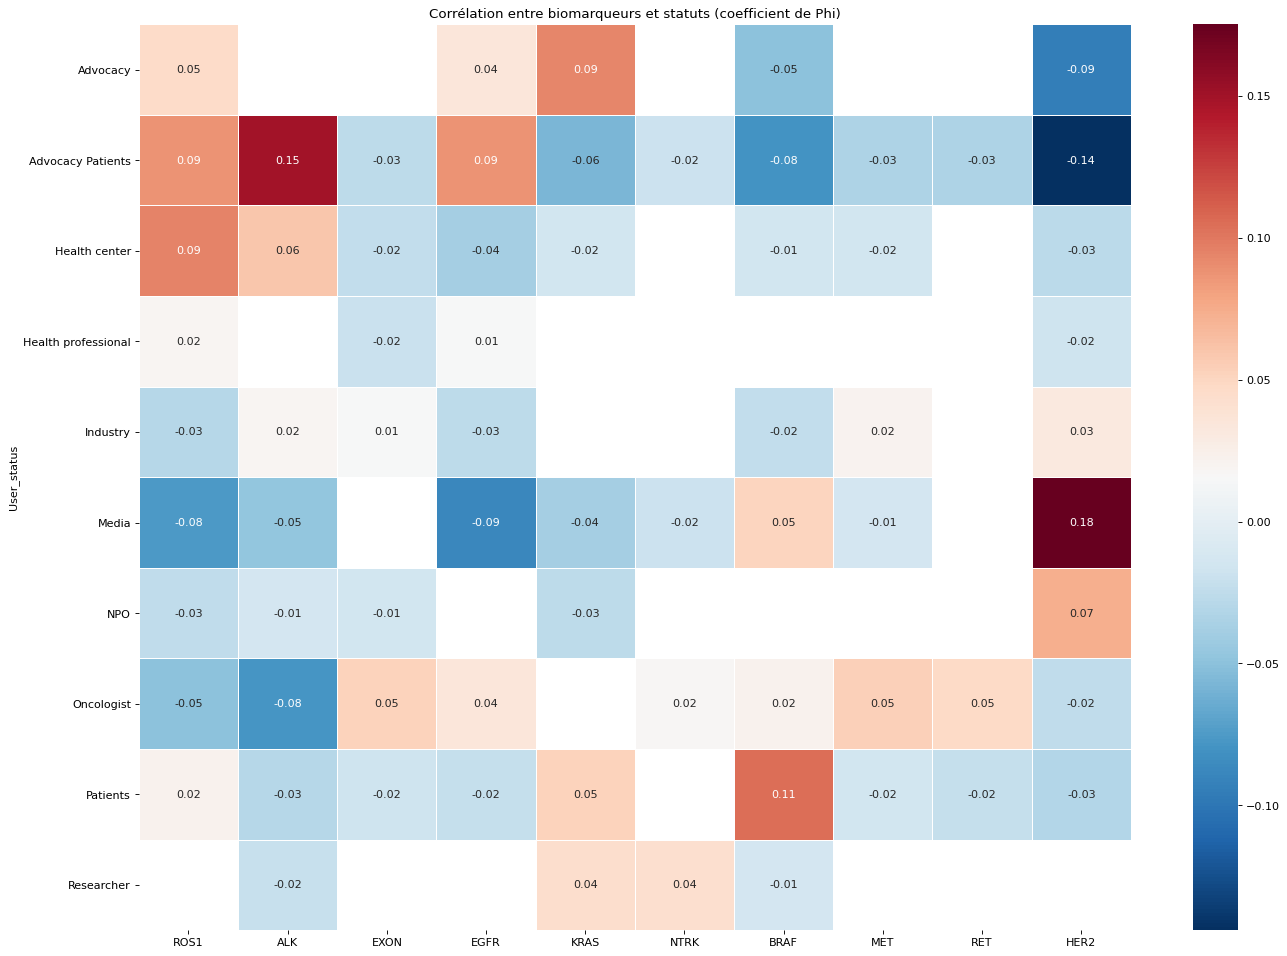

In [22]:
fig = plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(dft, annot=True, linewidths=.5, fmt='.2f',  cmap="RdBu_r")


#plt.savefig('biomarkers_dist.pdf')
res.set(title ="Corrélation entre biomarqueurs et statuts (coefficient de Phi)")